In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def graficar_barras_con_colores(datos, labels, xlabel, ylabel, title, varianzas, miny=None, maxy=None, width=0.5):
    # Verificar que los datos y las etiquetas tengan la misma longitud
    if len(datos) != len(labels):
        raise ValueError("La longitud de los datos y las etiquetas debe ser la misma.")

    # Crear la figura y el eje
    x = np.arange(len(labels))
    

    fig, ax = plt.subplots()
    
    colores = list(mcolors.TABLEAU_COLORS)  # Puedes cambiar la paleta de colores si lo prefieres

    # Crear las barras con colores diferentes
    for i, (valor, etiqueta) in enumerate(zip(datos, labels)):
        color = colores[i % len(colores)]  # Seleccionar el color correspondiente
        if varianzas is None:
            ax.bar(x[i], valor, width, color=color, label=etiqueta)
        else:
            ax.bar(x[i], valor, width, yerr=varianzas[i], capsize=5, color=color, label=etiqueta)
    
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # Establecer las etiquetas de las barras
    ax.set_xticks(range(len(datos)))
    ax.set_xticklabels(labels, rotation=90)
    
    if miny is not None and maxy is not None:
        plt.ylim(miny, maxy)

    # Mostrar la gráfica
    plt.show()
    

def graficar_puntos_con_linea(datos, xlabel, ylabel, title):
    # Convertir los datos a un formato numpy para facilitar el manejo
    datos_np = np.array(datos)

    # Crear la figura y los ejes
    fig, ax = plt.subplots()

    # Graficar los puntos
    ax.scatter(datos_np[:, 0], datos_np[:, 1])


    # Añadir etiquetas y título
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


    # Mostrar la gráfica
    plt.show()


In [2]:
import json
import numpy as np
from TP2.utils import *
import pandas as pd

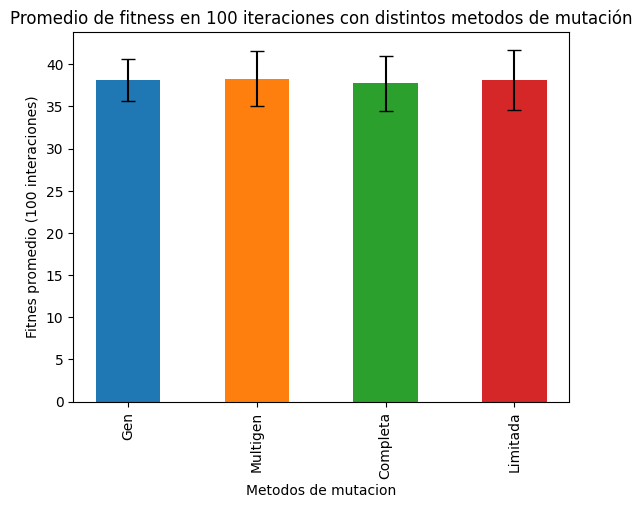

[38.11982862812775, 38.291543008334976, 37.72463692880506, 38.152629854369096]


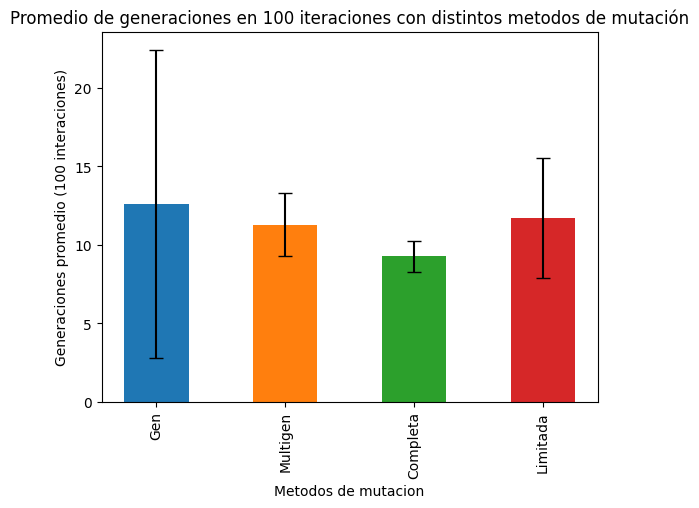

[12.61, 11.28, 9.26, 11.7]


In [3]:



#probabiliadd de mutacion en 0.7 y el resto arbitrario
#tenemos 8 mutaciones a analizar:
#   gen, multigen, completa, limitada. uniforme y no uniforme.

#Elegimos warrior y defensa aribitrario 

#El resultado -> ver que metodo de mutacion es el mejor. -> para ese metodo ver que % es el mejor.
resultados = []
varianzas = []
gen = []
varianza_gen = []
metodos_mutacion = ["gen","multigen","completa","limitada"]
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, None)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))
        varianza_gen.append(np.var(simulacion[:, 0]))


graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(resultados)

min_varianza = min(varianza_gen)
graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Generaciones promedio (100 interaciones)", "Promedio de generaciones en 100 iteraciones con distintos metodos de mutación", varianza_gen/min_varianza)
print(gen)

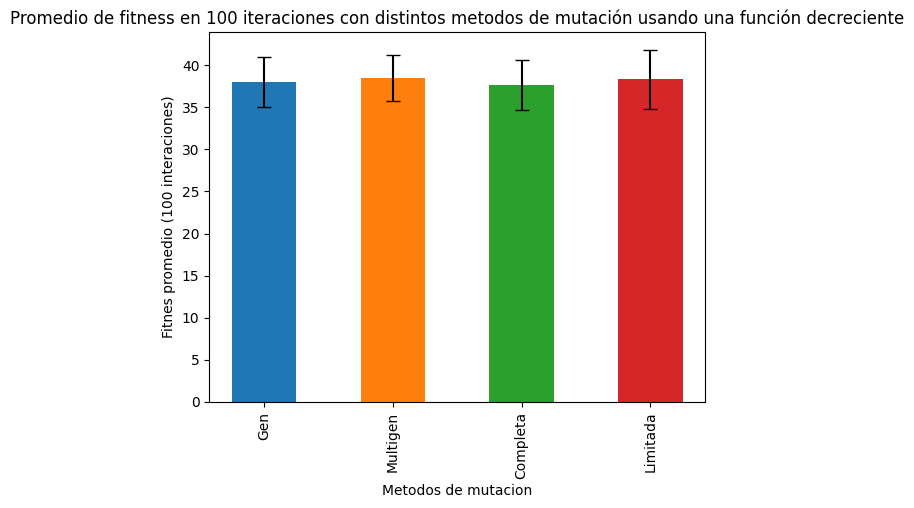

[38.00709884866557, 38.483893887348565, 37.69549842683045, 38.35449468729778]


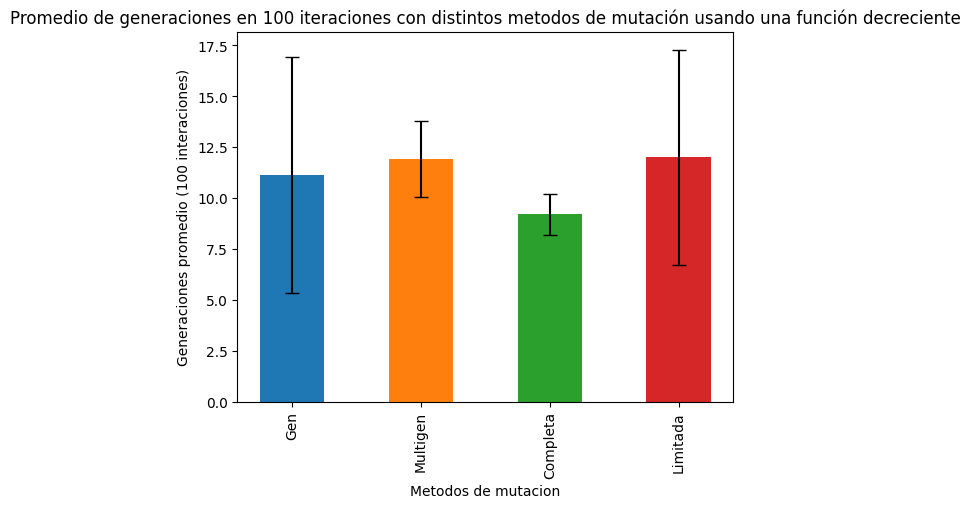

[11.14, 11.91, 9.19, 12.01]


In [4]:

gen = []
varianzas = []
resultados = []
varianza_gen = []
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, 'decreciente')
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))
        varianza_gen.append(np.var(simulacion[:, 0]))

graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación usando una función decreciente", varianzas)
print(resultados)

min_varianza = min(varianza_gen)
graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Generaciones promedio (100 interaciones)", "Promedio de generaciones en 100 iteraciones con distintos metodos de mutación usando una función decreciente", varianza_gen/min_varianza)
print(gen)

#Estamos viendo que metodo de mutacion es el que mejor fitness promedio nos da. Se puede ver que 
# no depende tanto del metodo.

#CHECKEAR SI ESTA OK GRAFICAR SOLO EL PROMEDIO O TAMBIEN MAXIMOS MINIMOS 

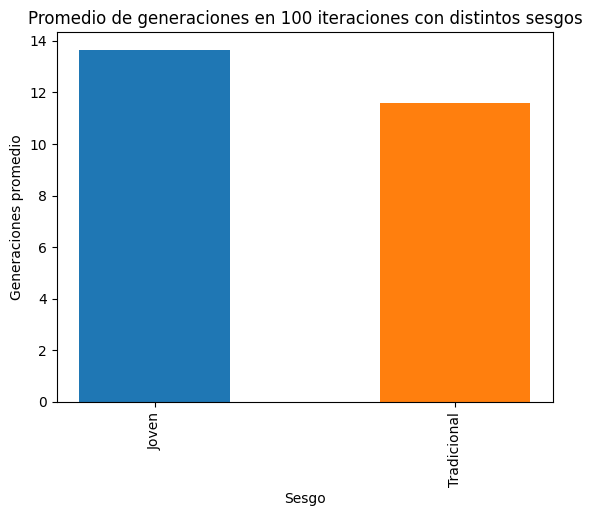

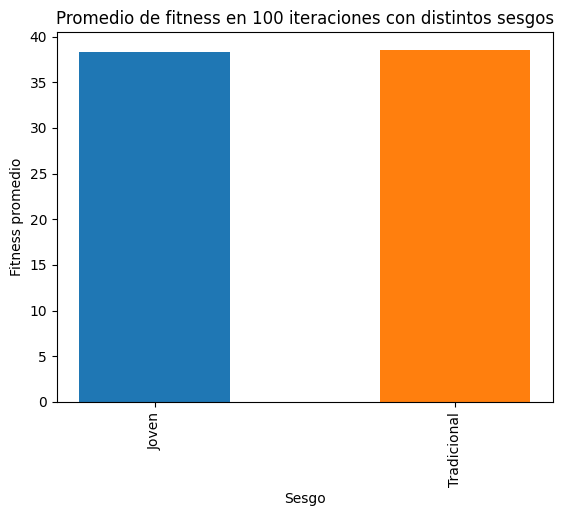

[13.65, 11.6]


In [5]:
#Ver si es mejor tradicional o joven (FIJAMOS GEN)

resultados = []
fitnessPromedio = []
crear_configuracion_sesgo(True)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))

crear_configuracion_sesgo(False)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))
        
graficar_barras_con_colores(resultados, ["Joven", 'Tradicional'], "Sesgo", "Generaciones promedio", "Promedio de generaciones en 100 iteraciones con distintos sesgos", None)


graficar_barras_con_colores(fitnessPromedio, ["Joven", 'Tradicional'], "Sesgo", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos sesgos", None)
print(resultados)


#Viendo el grafico se puede ver que luego de 100 iteraciones se consige el mismo fitness promedio  pero en el caso del sesgo joven, se consigue en mayor cantidad de generaciones (tarda mas en converger y llega al mismo resultado -> mas lento)


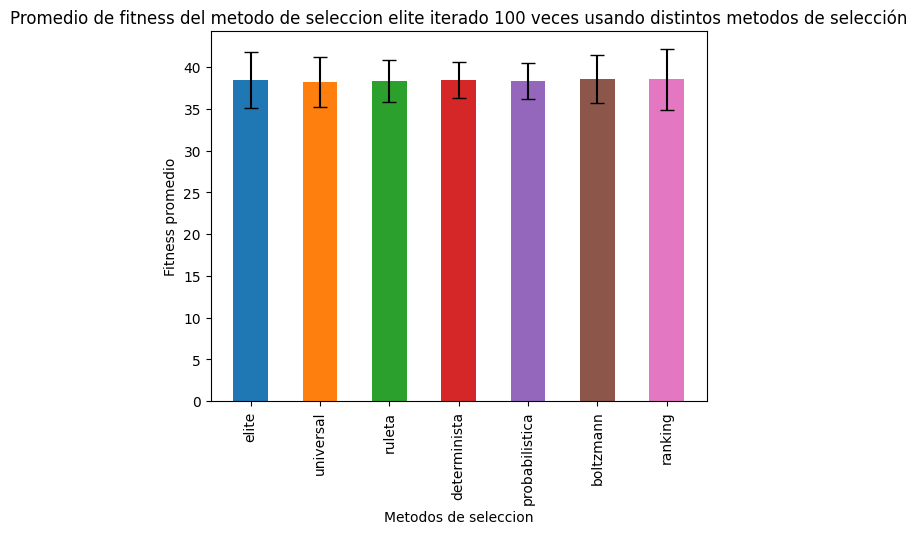

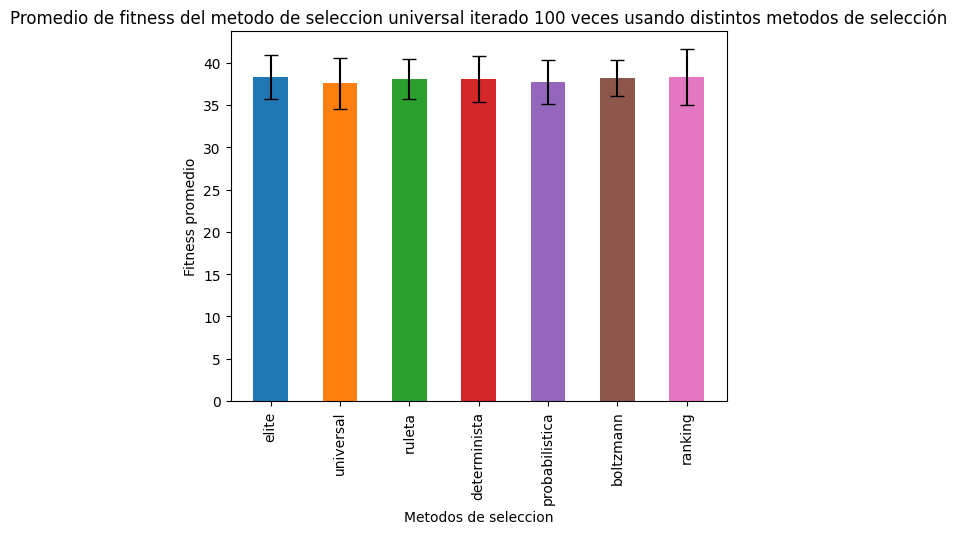

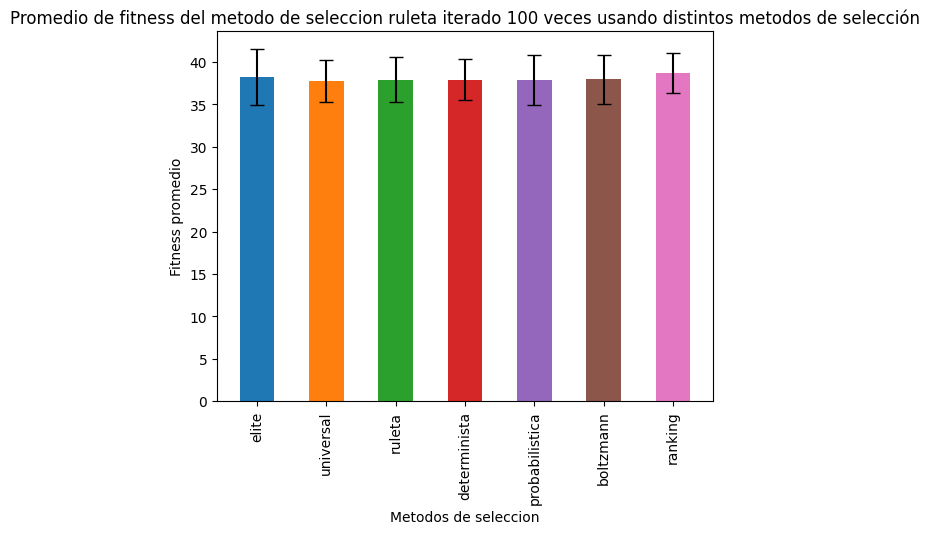

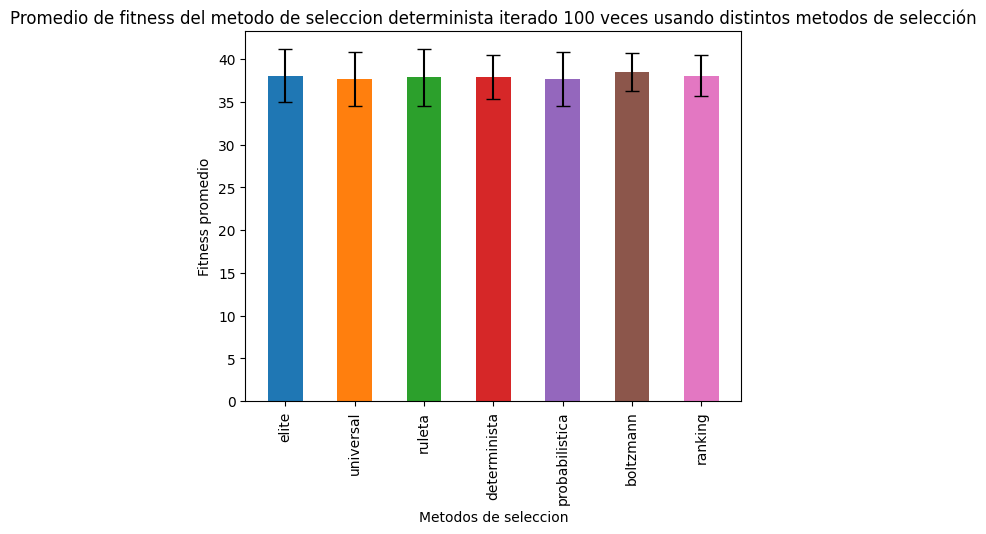

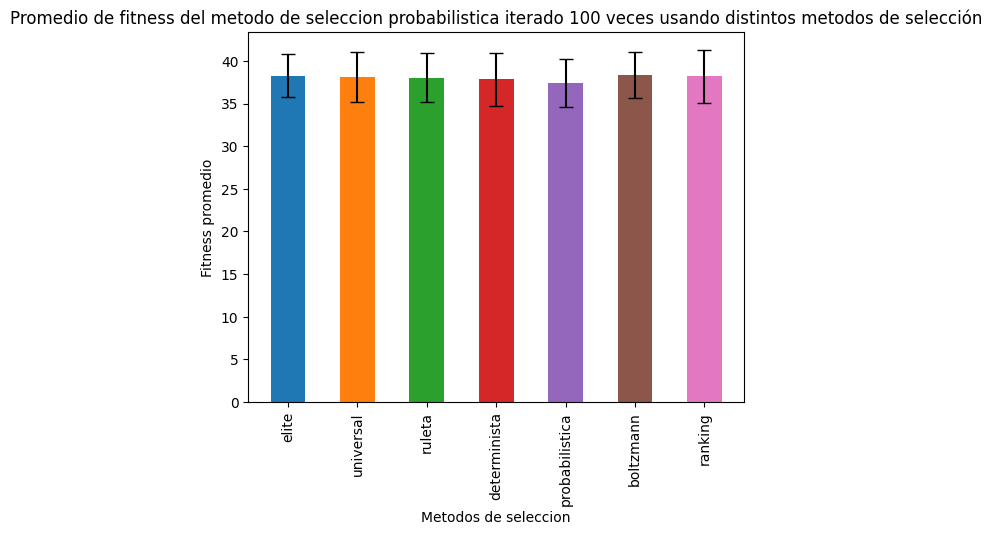

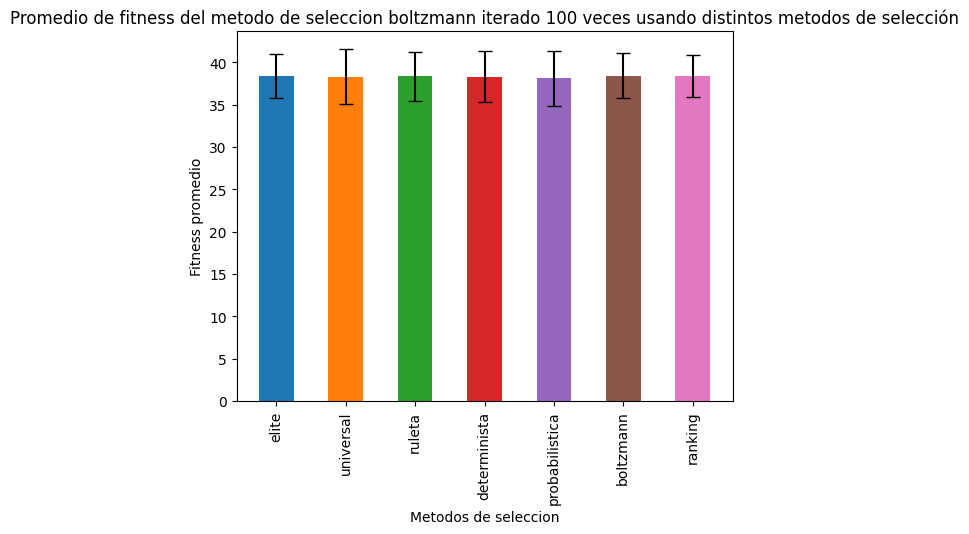

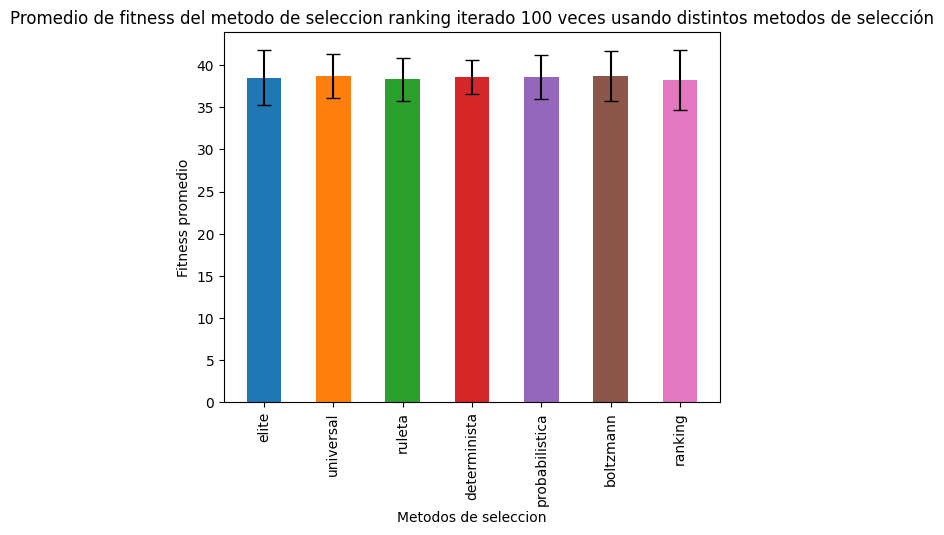

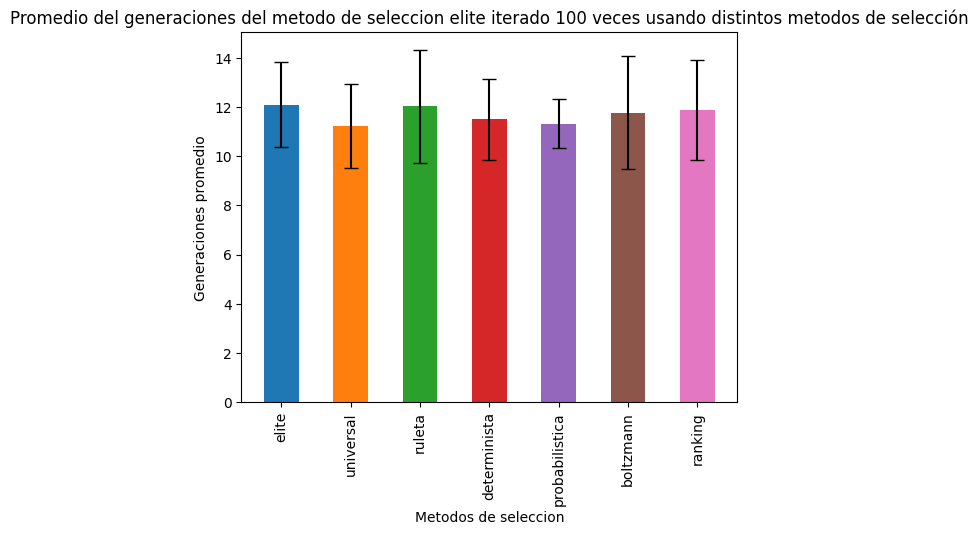

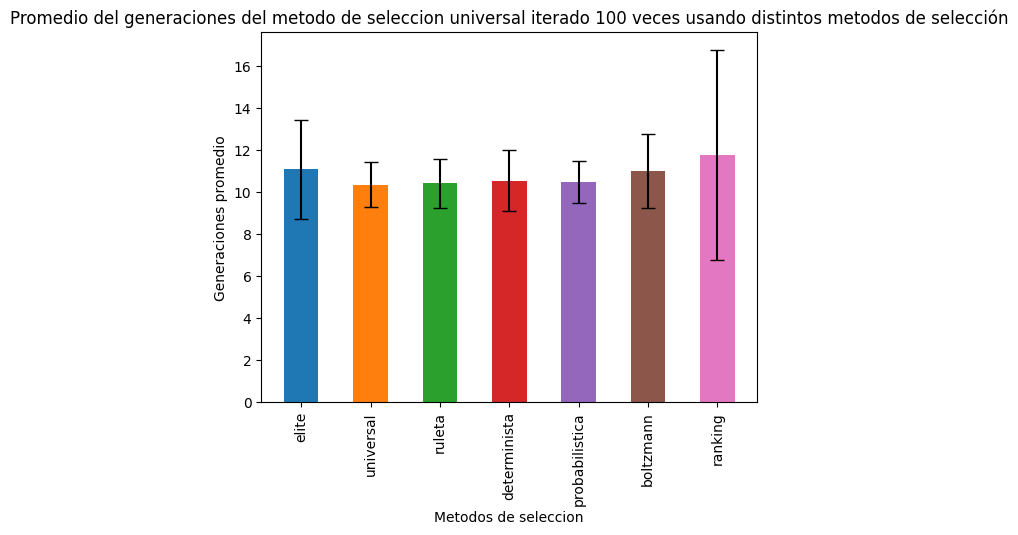

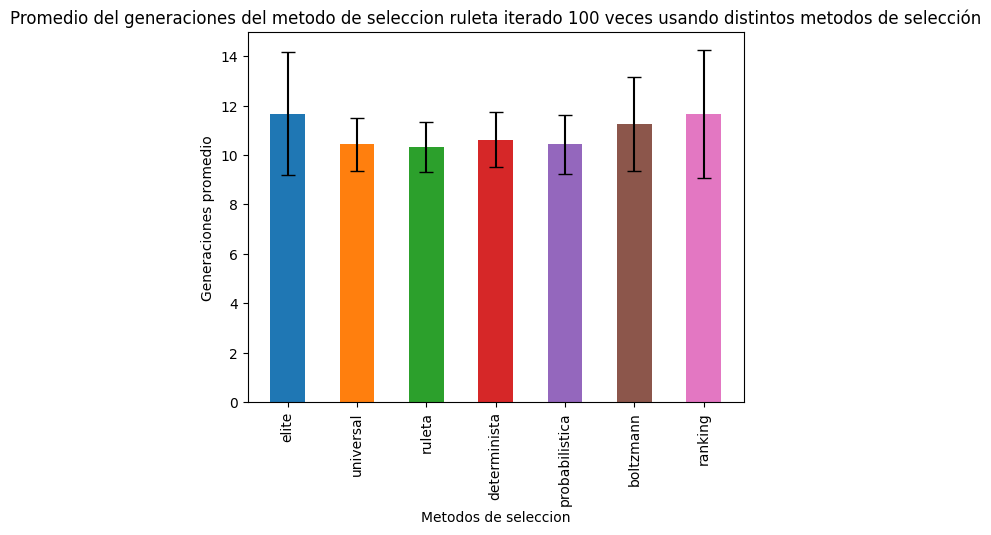

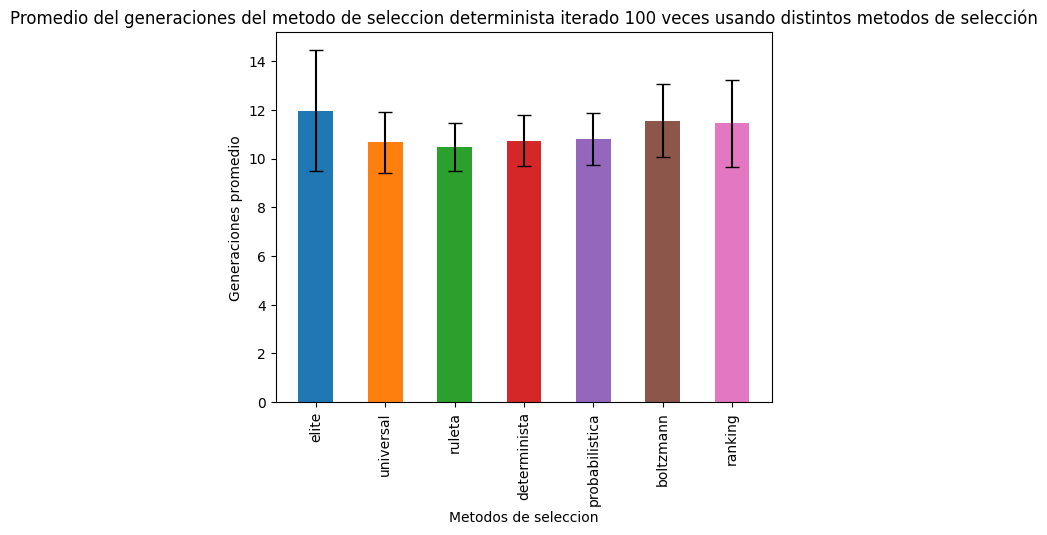

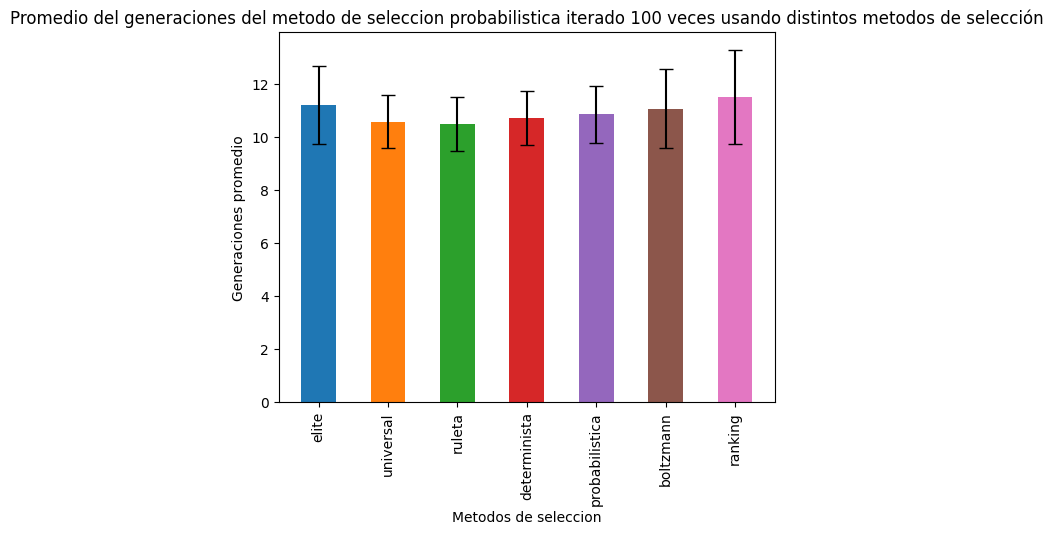

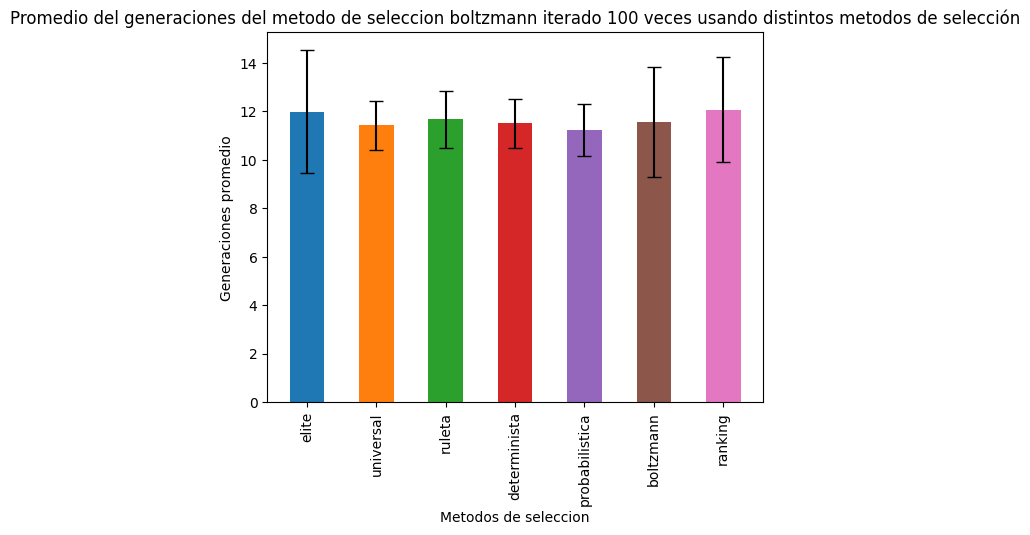

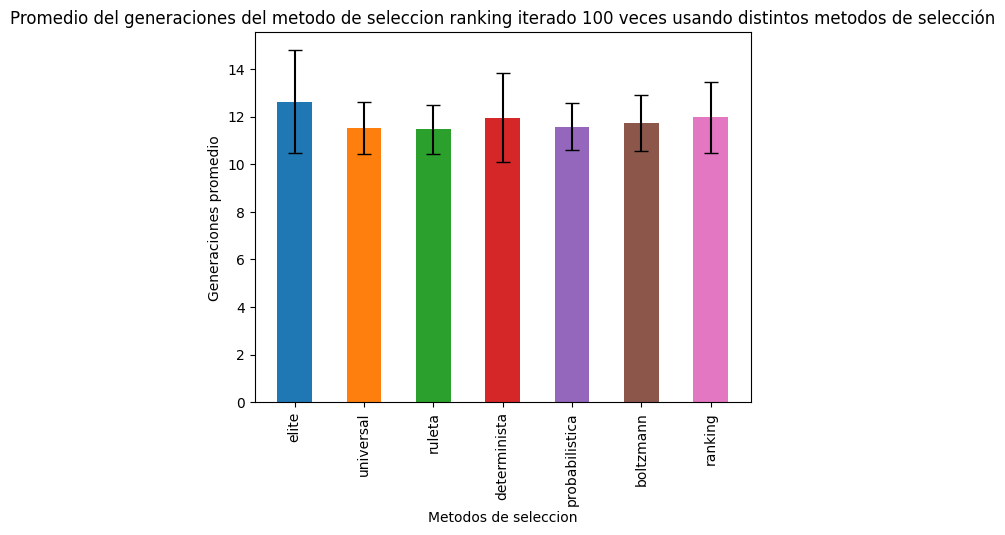

                    elite  universal     ruleta  boltzmann  determinista  \
elite           38.460211  38.252436  38.372852  38.439086     38.347747   
universal       38.339029  37.554893  38.089512  38.069949     37.718446   
ruleta          38.215237  37.754797  37.935235  37.928479     37.868232   
boltzmann       38.050909  37.643336  37.851601  37.875488     37.647555   
determinista    38.260084  38.082735  38.053530  37.829433     37.407512   
probabilistica  38.377538  38.336382  38.356509  38.328061     38.141544   
ranking         38.497200  38.727358  38.344191  38.547667     38.559580   

                probabilistica    ranking  
elite                38.565315  38.528393  
universal            38.191081  38.326717  
ruleta               37.937203  38.739020  
boltzmann            38.481901  38.056463  
determinista         38.349545  38.174807  
probabilistica       38.456633  38.405170  
ranking              38.752460  38.236220  




                elite  universal  r

In [6]:
#Metodos de reemplazo
#Repetir similar al anterior pero eligiendo ya los metodos 1 y 2, misma secuencia pero para los 3 y 4. 
#Elegimos boltzmann y universal como metodos de seleccion
metodos_reemplazo = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzmann", "ranking"]

resultados = []
generacion = []
varianza = []
varianza_generacion = []
for metodo1 in metodos_reemplazo:
    resultados_metodo = []
    generacion_metodo = []
    varianza_generacion_metodo = []
    varianza_metodo = []
    for metodo2 in metodos_reemplazo:
        crear_configuracion_seleccion(metodo1, metodo2)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 2]))
            varianza_metodo.append(np.var(simulacion[:, 2]))
            generacion_metodo.append(np.mean(simulacion[:, 0]))
            varianza_generacion_metodo.append(np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo)
    varianza.append(varianza_metodo)
    varianza_generacion.append(varianza_generacion_metodo)
    generacion.append(generacion_metodo)

for i, res in enumerate(resultados):
    titulo = "Promedio de fitness del metodo de seleccion " + metodos_reemplazo[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_reemplazo, "Metodos de seleccion", "Fitness promedio", titulo, varianza[i])
    
for i, res in enumerate(generacion):
    minvar = min(varianza_generacion[i])
    titulo = "Promedio del generaciones del metodo de seleccion " + metodos_reemplazo[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_reemplazo, "Metodos de seleccion", "Generaciones promedio", titulo, varianza_generacion[i]/minvar)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)
df_gen = pd.DataFrame(generacion, columns=metodos_seleccion, index=metodos_seleccion)
print(df_resultados)
print("\n\n\n")
print(df_gen)

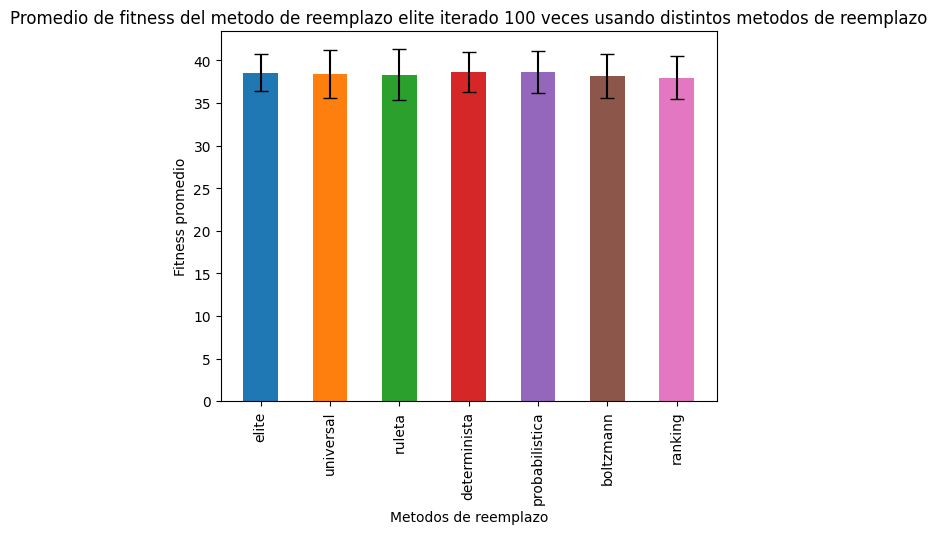

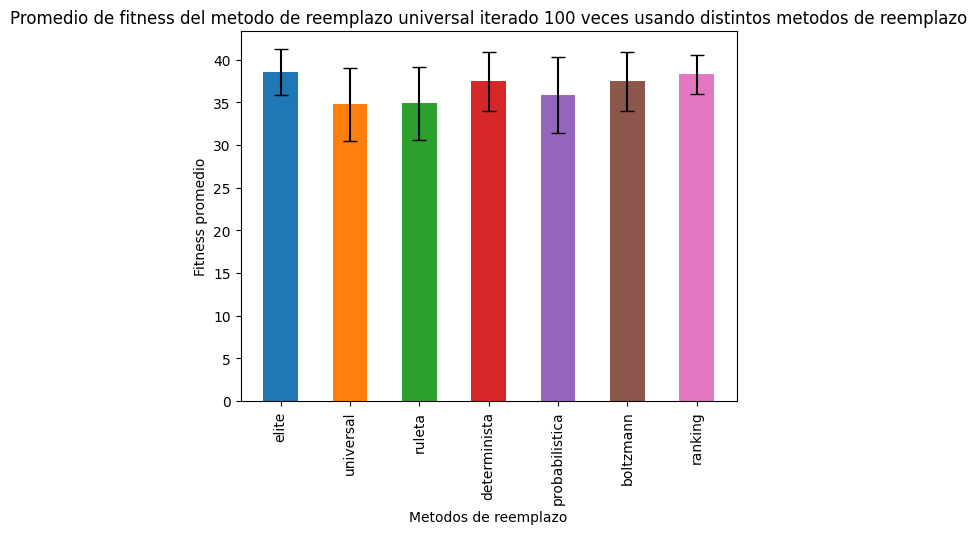

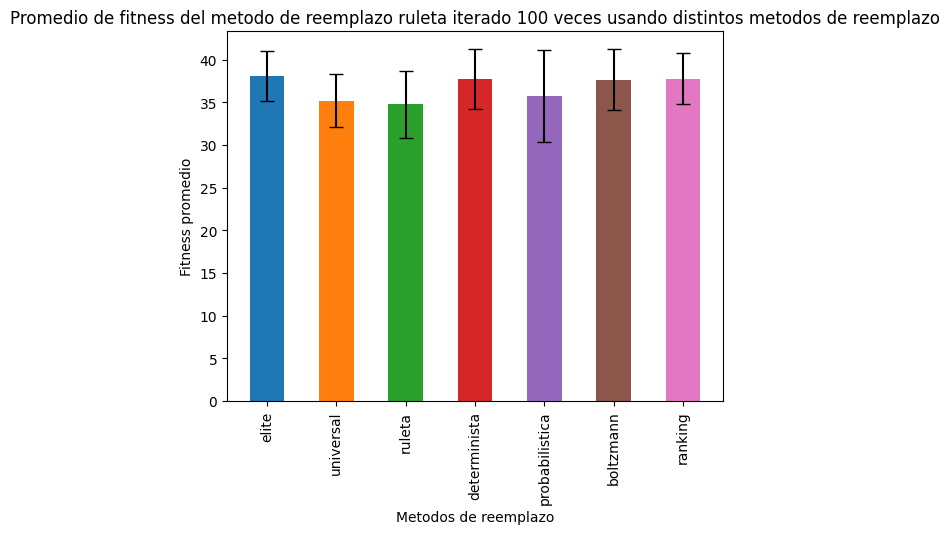

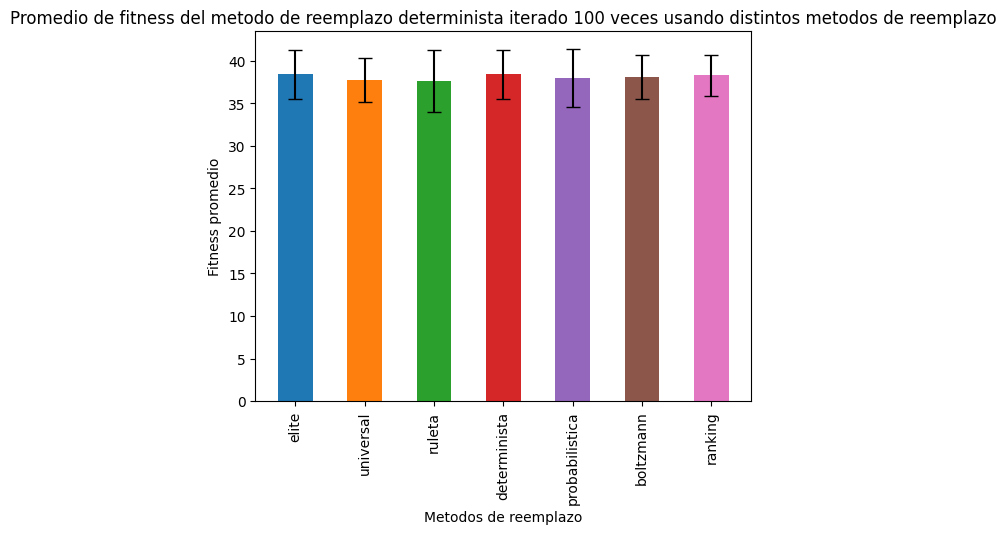

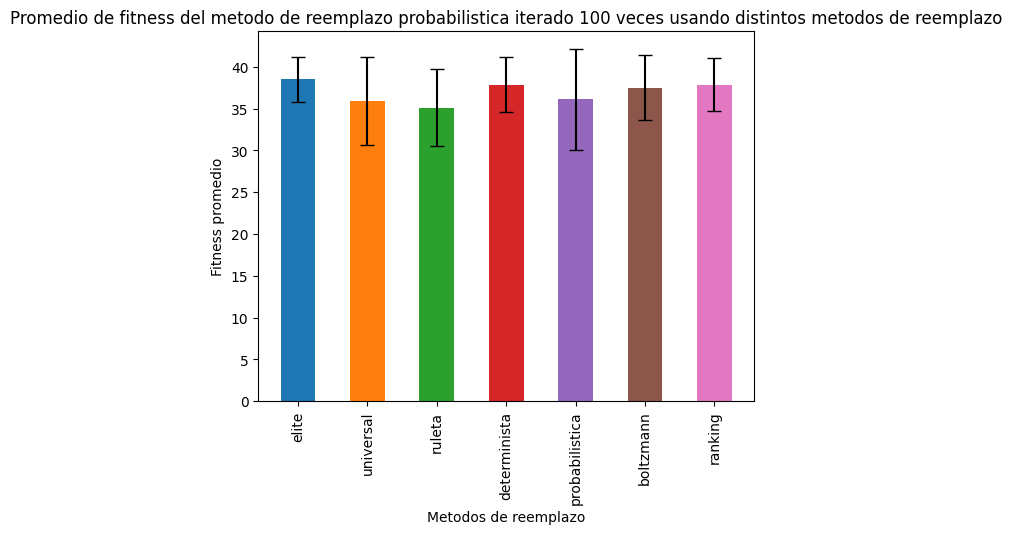

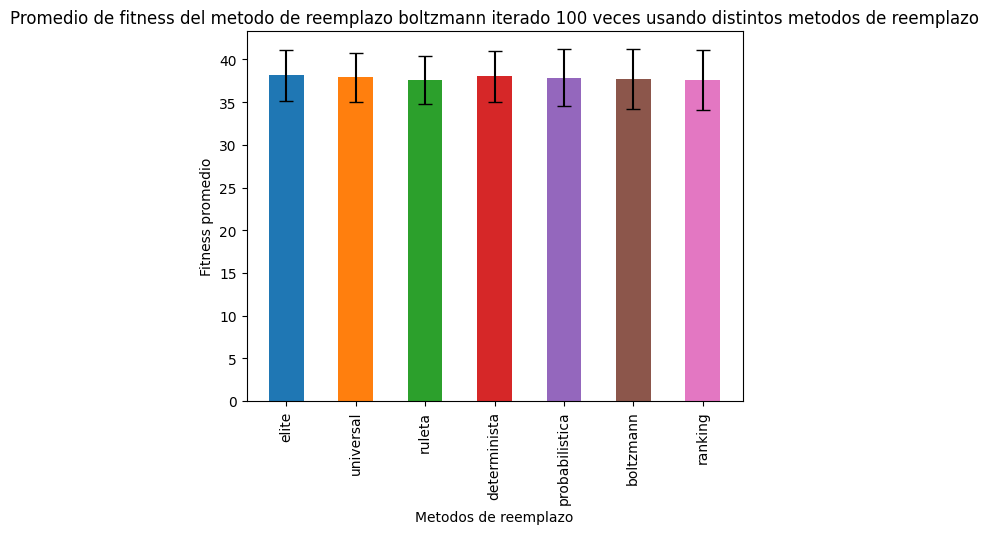

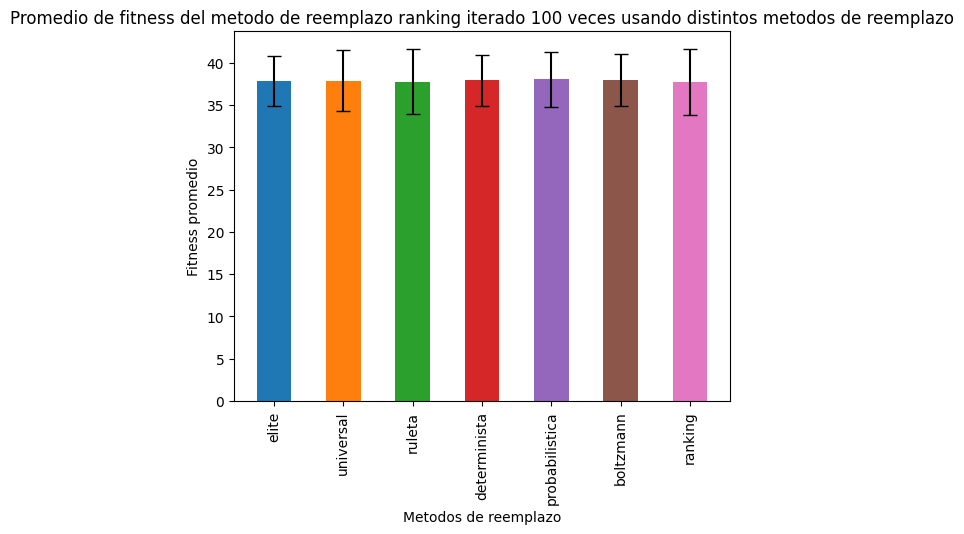

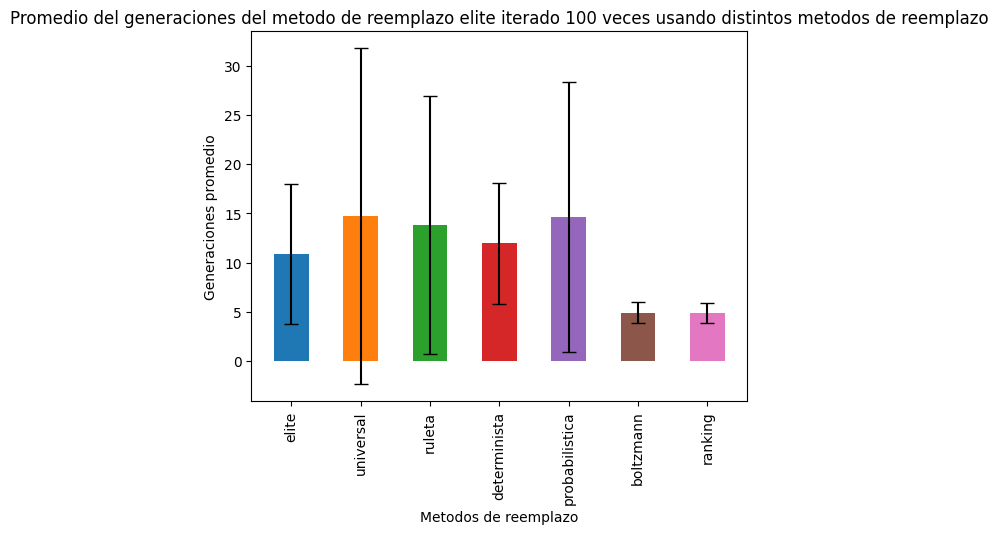

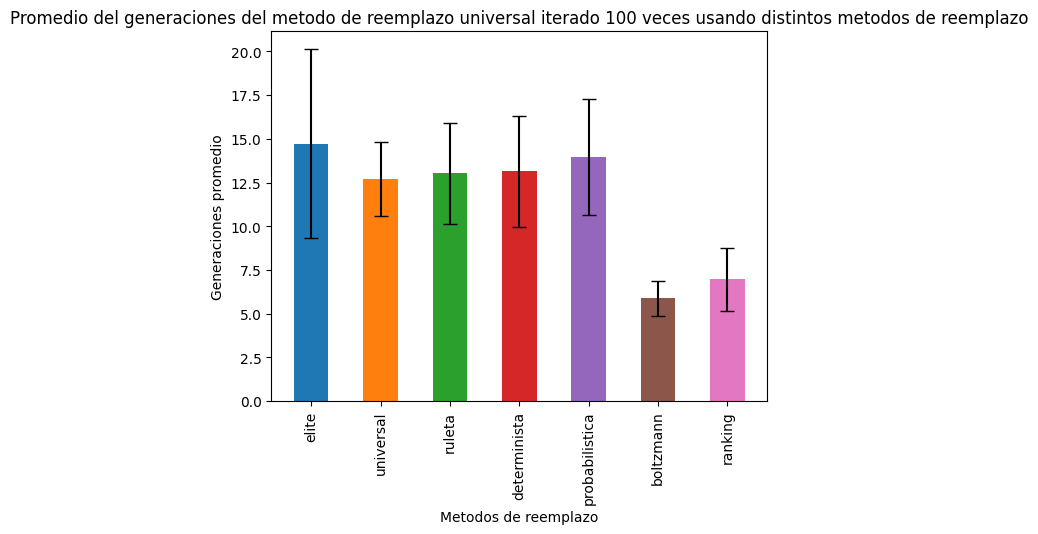

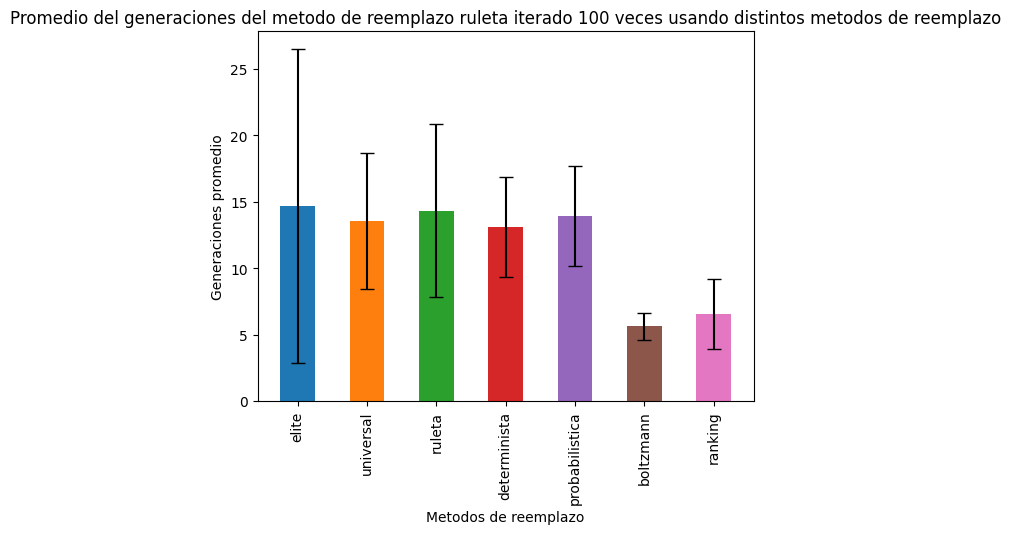

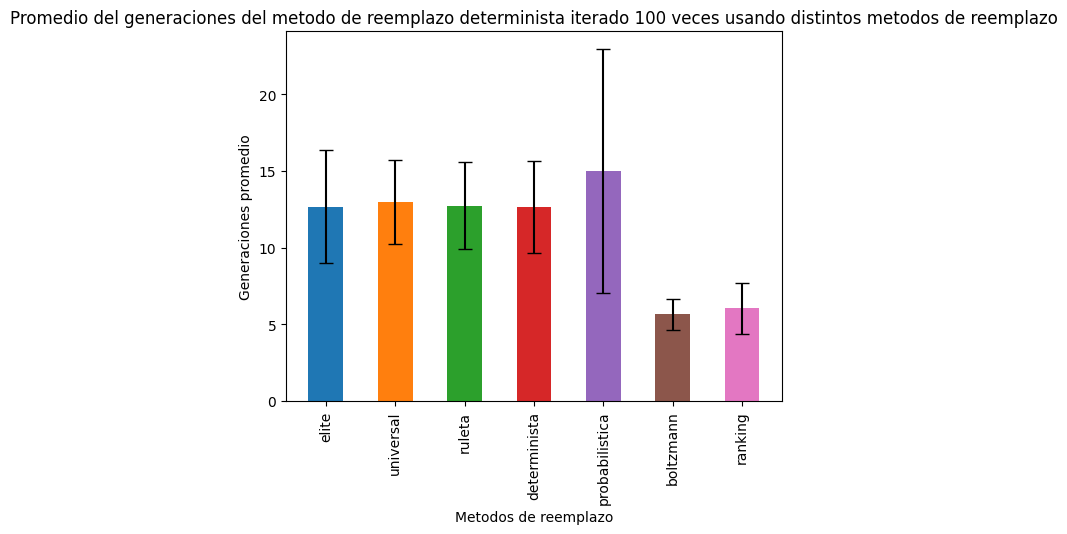

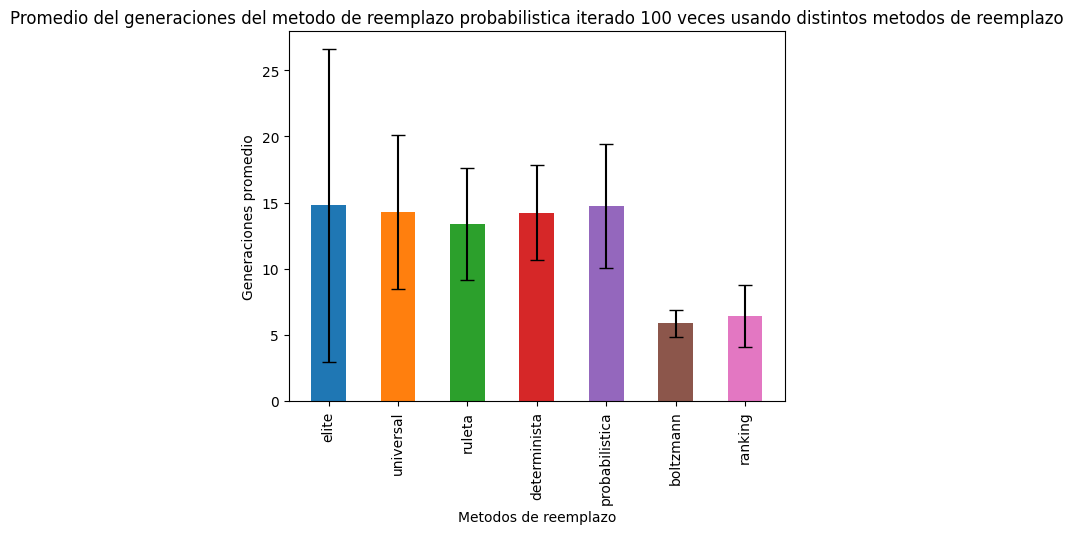

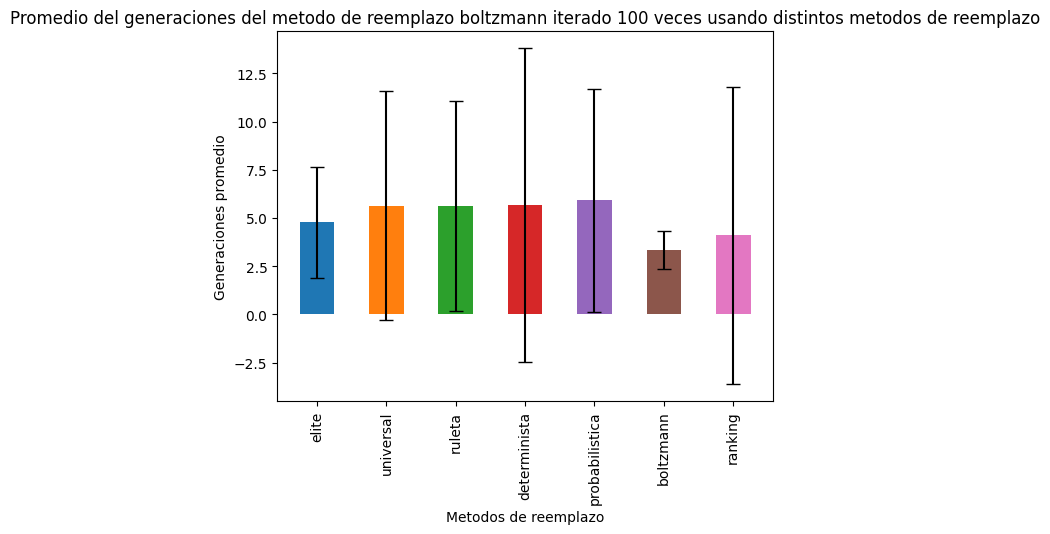

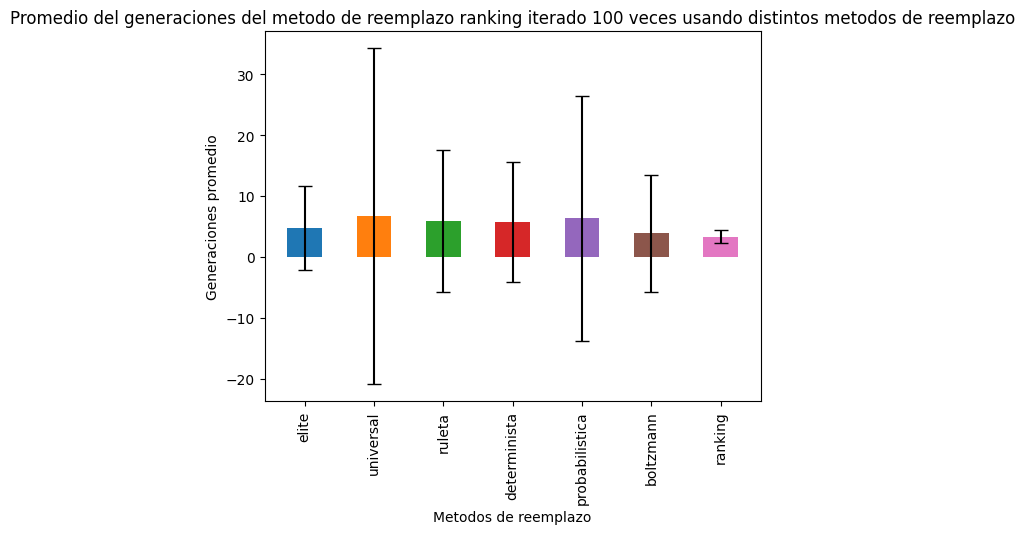

                    elite  universal     ruleta  boltzmann  determinista  \
elite           38.573112  38.425094  38.321218  38.653066     38.676716   
universal       38.552378  34.789060  34.870453  37.447462     35.854538   
ruleta          38.090988  35.223198  34.771672  37.742490     35.737147   
boltzmann       38.391998  37.710292  37.599507  38.437090     37.963956   
determinista    38.507919  35.884614  35.102416  37.870967     36.092890   
probabilistica  38.132198  37.890325  37.637865  38.033177     37.878481   
ranking         37.831108  37.879241  37.724738  37.884569     38.040358   

                probabilistica    ranking  
elite                38.184636  37.978597  
universal            37.480673  38.293972  
ruleta               37.678019  37.766940  
boltzmann            38.081611  38.267742  
determinista         37.474863  37.867739  
probabilistica       37.704016  37.604002  
ranking              37.924889  37.687513  




                elite  universal  r

In [7]:
metodos_reemplazo = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzmann", "ranking"]

resultados = []
generacion = []
varianza = []
varianza_generacion = []
for metodo3 in metodos_reemplazo:
    resultados_metodo = []
    generacion_metodo = []
    varianza_generacion_metodo = []
    varianza_metodo = []
    for metodo4 in metodos_reemplazo:
        crear_configuracion_reemplazo(metodo3, metodo4)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 2]))
            varianza_metodo.append(np.var(simulacion[:, 2]))
            generacion_metodo.append(np.mean(simulacion[:, 0]))
            varianza_generacion_metodo.append(np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo)
    varianza.append(varianza_metodo)
    varianza_generacion.append(varianza_generacion_metodo)
    generacion.append(generacion_metodo)

for i, res in enumerate(resultados):
    titulo = "Promedio de fitness del metodo de reemplazo " + metodos_reemplazo[i] + " iterado 100 veces usando distintos metodos de reemplazo"
    graficar_barras_con_colores(res, metodos_reemplazo, "Metodos de reemplazo", "Fitness promedio", titulo, varianza[i])
    
for i, res in enumerate(generacion):
    minvar = min(varianza_generacion[i])
    titulo = "Promedio del generaciones del metodo de reemplazo " + metodos_reemplazo[i] + " iterado 100 veces usando distintos metodos de reemplazo"
    graficar_barras_con_colores(res, metodos_reemplazo, "Metodos de reemplazo", "Generaciones promedio", titulo, varianza_generacion[i]/minvar)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)
df_gen = pd.DataFrame(generacion, columns=metodos_seleccion, index=metodos_seleccion)
print(df_resultados)
print("\n\n\n")
print(df_gen)

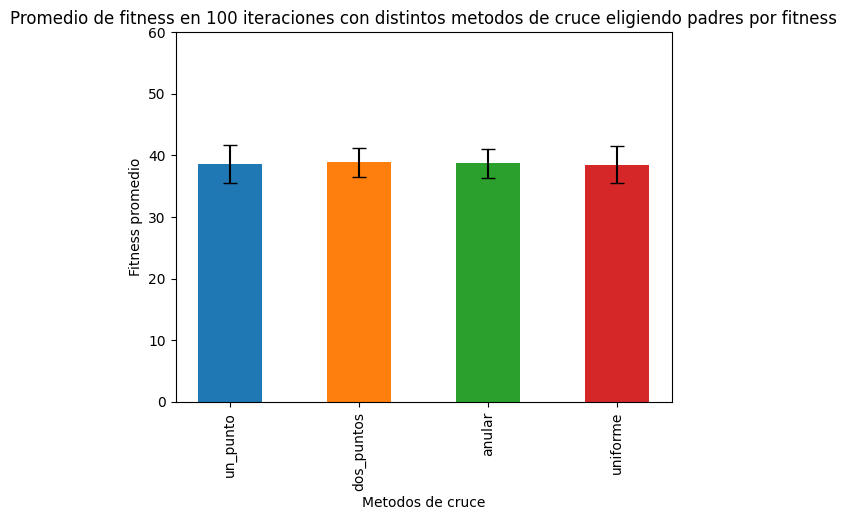

[38.56601784249404, 38.856285038962426, 38.68815880380598, 38.47874550024808]


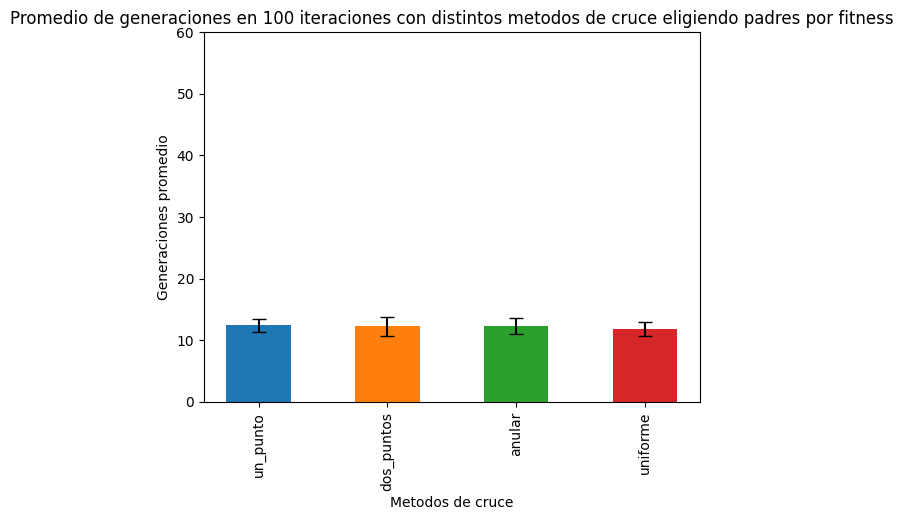

[12.39, 12.25, 12.28, 11.78]


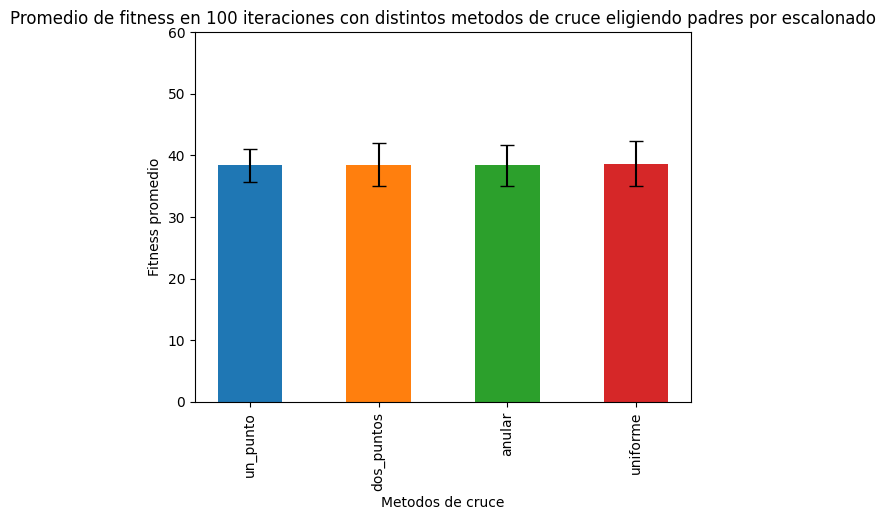

[38.378762724413846, 38.44682981660184, 38.39817464801375, 38.65301940237088]


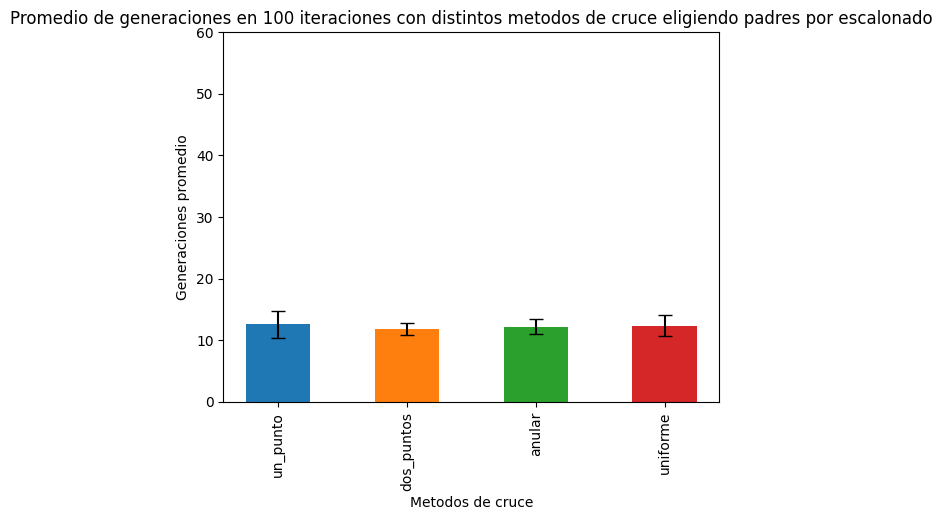

[12.55, 11.82, 12.2, 12.36]


In [8]:
#elegimos de metodos de reemplazo (3 y 4) a elite y determinista

metodos_cruce = ["un_punto", "dos_puntos", "anular", "uniforme"]
metodo_seleccion_cruce = ["fitness", "escalonado"]


for metodo_seleccion in metodo_seleccion_cruce:
    resultados = []
    generaciones = []
    varianza = []
    varianza_gen = []
    for metodo in metodos_cruce:
        crear_configuracion_cruce(metodo, metodo_seleccion)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados.append(np.mean(simulacion[:, 2]))
            generaciones.append(np.mean(simulacion[:, 0]))
            varianza.append(np.var(simulacion[:, 2]))
            varianza_gen.append(np.var(simulacion[:, 0]))
    graficar_barras_con_colores(resultados, metodos_cruce, "Metodos de cruce", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de cruce eligiendo padres por " + metodo_seleccion, varianza,0,60)
    print(resultados)


    min_varianza_gen = min(varianza_gen)
    graficar_barras_con_colores(generaciones, metodos_cruce, "Metodos de cruce", "Generaciones promedio", "Promedio de generaciones en 100 iteraciones con distintos metodos de cruce eligiendo padres por " + metodo_seleccion, varianza_gen/min_varianza_gen,0,60)
    print(generaciones)

In [9]:
#Mejores configuraciones!
clases = ["GUERRERO", "DEFENSOR", "ARQUERO", "INFILTRADO"]

for clase in clases:
    crear_configuracion_clase(clase)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        max_fitness_player = max(simulacion[:, 1], key=lambda player: player.fitness)
        print(max_fitness_player)


Clase: Clase.GUERRERO Fitness: 41.04670523286893 Altura: 1.907860721111385 Fuerza: 77.0452239659158 Agilidad: 72.3850808338944 Pericia: 0.21130433871850965 Resistencia: 0.10029595003860058 Vida: 0.2580949114326658
Clase: Clase.DEFENSOR Fitness: 54.316968260169766 Altura: 1.3 Fuerza: 2.779509420500356 Agilidad: 4.28647235932585 Pericia: 1.760914100738679 Resistencia: 69.44175851017928 Vida: 71.73134560925583
Clase: Clase.ARQUERO Fitness: 61.66655598815275 Altura: 1.91 Fuerza: 78.00536903686893 Agilidad: 71.26677873788438 Pericia: 0.6180862911422172 Resistencia: 0.02009000626413784 Vida: 0.08967592784035015
Clase: Clase.INFILTRADO Fitness: 54.885805863460966 Altura: 1.9159911705571104 Fuerza: 75.22088803128923 Agilidad: 74.22704472218771 Pericia: 0.31810499833318484 Resistencia: 0.010038821304055683 Vida: 0.2239234268858203


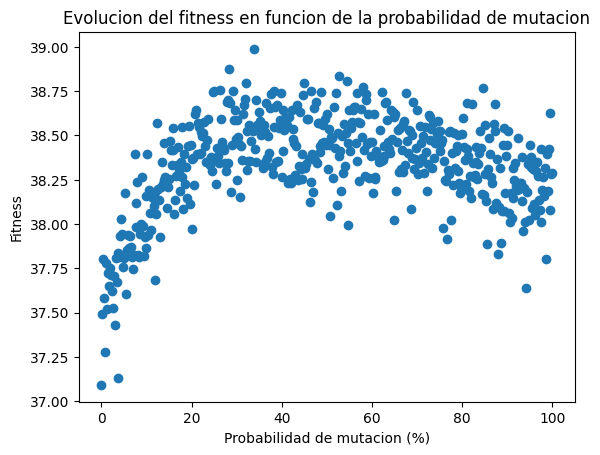

In [10]:
resultados = []

for prob in range(0, 1001, 2):
    crear_configuracion_mutacion(prob/1000, "multigen", "decreciente")
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(( prob/10,np.mean(simulacion[:, 2])))
        
graficar_puntos_con_linea(resultados, 'Probabilidad de mutacion (%)', 'Fitness', 'Evolucion del fitness en funcion de la probabilidad de mutacion')

#Es mas amplio al final (mas varianza) mas irregular por ser tan random.
#Llega a 36 (convergencia prematura!) ya que sigue siendo elite el metodo de remplazo

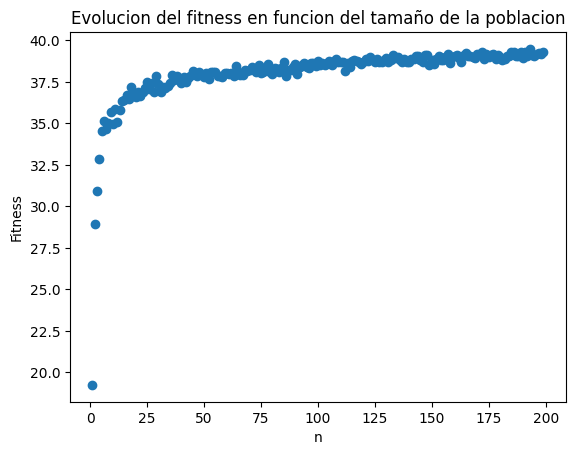

In [11]:
resultados = []

for n in range(1, 200):
    crear_configuracion_n(n)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(( n,np.mean(simulacion[:, 2])))
        
graficar_puntos_con_linea(resultados, 'n', 'Fitness', 'Evolucion del fitness en funcion del tamaño de la poblacion')

